### Tensorflow分类任务:

读取Mnist数据集
- 会自动进行下载

In [62]:
%matplotlib inline

In [63]:
from pathlib import Path
import requests

DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"

PATH.mkdir(parents=True, exist_ok=True)

URL = "http://deeplearning.net/data/mnist/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
        content = requests.get(URL + FILENAME).content
        (PATH / FILENAME).open("wb").write(content)

In [64]:
import pickle
import gzip

with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
        ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

784是mnist数据集每个样本的像素点个数

(50000, 784)


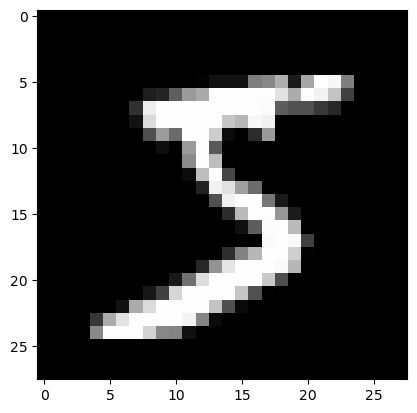

In [65]:
from matplotlib import pyplot
import numpy as np

pyplot.imshow(x_train[0].reshape((28, 28)), cmap="gray")
print(x_train.shape)

<img src="./img/4.png" alt="FAO" width="790">

<img src="./img/5.png" alt="FAO" width="790">

In [66]:
y_train[0]

5

In [67]:
import tensorflow as tf
from tensorflow.keras import layers

In [68]:
model = tf.keras.Sequential()
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

选择损失和评估函数时候需要选择合适的,Api参考：https://tensorflow.google.cn/api_docs/python/tf/keras/metrics/SparseCategoricalAccuracy?version=stable

一定选择合适的损失函数

In [69]:
tf.losses.CategoricalCrossentropy

keras.losses.CategoricalCrossentropy

In [70]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
             loss=tf.losses.CategoricalCrossentropy(),
             metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [71]:
model.fit(x_train, y_train, epochs=5, batch_size=64,
          validation_data=(x_valid, y_valid))

Epoch 1/5


ValueError: in user code:

    File "/Users/liyinbin/miniconda3/envs/tf-learn/lib/python3.7/site-packages/keras/engine/training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "/Users/liyinbin/miniconda3/envs/tf-learn/lib/python3.7/site-packages/keras/engine/training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/liyinbin/miniconda3/envs/tf-learn/lib/python3.7/site-packages/keras/engine/training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "/Users/liyinbin/miniconda3/envs/tf-learn/lib/python3.7/site-packages/keras/engine/training.py", line 860, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/liyinbin/miniconda3/envs/tf-learn/lib/python3.7/site-packages/keras/engine/training.py", line 919, in compute_loss
        y, y_pred, sample_weight, regularization_losses=self.losses)
    File "/Users/liyinbin/miniconda3/envs/tf-learn/lib/python3.7/site-packages/keras/engine/compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/liyinbin/miniconda3/envs/tf-learn/lib/python3.7/site-packages/keras/losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "/Users/liyinbin/miniconda3/envs/tf-learn/lib/python3.7/site-packages/keras/losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/liyinbin/miniconda3/envs/tf-learn/lib/python3.7/site-packages/keras/losses.py", line 1790, in categorical_crossentropy
        y_true, y_pred, from_logits=from_logits, axis=axis)
    File "/Users/liyinbin/miniconda3/envs/tf-learn/lib/python3.7/site-packages/keras/backend.py", line 5083, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 10) are incompatible


In [72]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.005),
             loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [73]:
model.fit(x_train, y_train, epochs=5, batch_size=64,
          validation_data=(x_valid, y_valid))

Epoch 1/5
782/782 [==============================] - 1s 1ms/step - loss: 0.3168 - sparse_categorical_accuracy: 0.9046 - val_loss: 0.1941 - val_sparse_categorical_accuracy: 0.9441
Epoch 2/5
782/782 [==============================] - 1s 1ms/step - loss: 0.1807 - sparse_categorical_accuracy: 0.9462 - val_loss: 0.1509 - val_sparse_categorical_accuracy: 0.9566
Epoch 3/5
782/782 [==============================] - 1s 1ms/step - loss: 0.1440 - sparse_categorical_accuracy: 0.9558 - val_loss: 0.1460 - val_sparse_categorical_accuracy: 0.9559
Epoch 4/5
782/782 [==============================] - 1s 1ms/step - loss: 0.1287 - sparse_categorical_accuracy: 0.9611 - val_loss: 0.1452 - val_sparse_categorical_accuracy: 0.9571
Epoch 5/5
782/782 [==============================] - 1s 1ms/step - loss: 0.1162 - sparse_categorical_accuracy: 0.9636 - val_loss: 0.1482 - val_sparse_categorical_accuracy: 0.9581


### tf.data模块常用函数

In [20]:
import numpy as np
input_data = np.arange(16)
input_data

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [21]:
dataset = tf.data.Dataset.from_tensor_slices(input_data)
for data in dataset:
    print (data)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)
tf.Tensor(10, shape=(), dtype=int64)
tf.Tensor(11, shape=(), dtype=int64)
tf.Tensor(12, shape=(), dtype=int64)
tf.Tensor(13, shape=(), dtype=int64)
tf.Tensor(14, shape=(), dtype=int64)
tf.Tensor(15, shape=(), dtype=int64)


#### repeat操作

In [22]:
dataset = tf.data.Dataset.from_tensor_slices(input_data)
dataset = dataset.repeat(2)
for data in dataset:
    print (data)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)
tf.Tensor(10, shape=(), dtype=int64)
tf.Tensor(11, shape=(), dtype=int64)
tf.Tensor(12, shape=(), dtype=int64)
tf.Tensor(13, shape=(), dtype=int64)
tf.Tensor(14, shape=(), dtype=int64)
tf.Tensor(15, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)
tf.Tensor(10, shape=(), dtype=int64)
tf.Tensor(11, shape=(

#### batch操作

In [23]:
dataset = tf.data.Dataset.from_tensor_slices(input_data)
dataset = dataset.repeat(2).batch(4)
for data in dataset:
    print (data)

tf.Tensor([0 1 2 3], shape=(4,), dtype=int64)
tf.Tensor([4 5 6 7], shape=(4,), dtype=int64)
tf.Tensor([ 8  9 10 11], shape=(4,), dtype=int64)
tf.Tensor([12 13 14 15], shape=(4,), dtype=int64)
tf.Tensor([0 1 2 3], shape=(4,), dtype=int64)
tf.Tensor([4 5 6 7], shape=(4,), dtype=int64)
tf.Tensor([ 8  9 10 11], shape=(4,), dtype=int64)
tf.Tensor([12 13 14 15], shape=(4,), dtype=int64)


#### shuffle操作

In [24]:
dataset = tf.data.Dataset.from_tensor_slices(input_data).shuffle(buffer_size=10).batch(4)
for data in dataset:
    print (data)

tf.Tensor([3 7 9 4], shape=(4,), dtype=int64)
tf.Tensor([11  0 14 10], shape=(4,), dtype=int64)
tf.Tensor([15  5  2  1], shape=(4,), dtype=int64)
tf.Tensor([13 12  6  8], shape=(4,), dtype=int64)


#### 重新训练

In [25]:
train = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train = train.batch(32)
train = train.repeat()

valid = tf.data.Dataset.from_tensor_slices((x_valid, y_valid))
valid = valid.batch(32)
valid = valid.repeat()

model.fit(train, epochs=5,steps_per_epoch=100, validation_data=valid,validation_steps=100)

Epoch 1/5
100/100 [==============================] - 0s 2ms/step - loss: 0.1182 - sparse_categorical_accuracy: 0.9672 - val_loss: 0.2430 - val_sparse_categorical_accuracy: 0.9356
Epoch 2/5
100/100 [==============================] - 0s 2ms/step - loss: 0.1503 - sparse_categorical_accuracy: 0.9547 - val_loss: 0.2725 - val_sparse_categorical_accuracy: 0.9369
Epoch 3/5
100/100 [==============================] - 0s 2ms/step - loss: 0.1983 - sparse_categorical_accuracy: 0.9469 - val_loss: 0.2103 - val_sparse_categorical_accuracy: 0.9375
Epoch 4/5
100/100 [==============================] - 0s 2ms/step - loss: 0.1772 - sparse_categorical_accuracy: 0.9453 - val_loss: 0.3078 - val_sparse_categorical_accuracy: 0.9228
Epoch 5/5
100/100 [==============================] - 0s 2ms/step - loss: 0.1678 - sparse_categorical_accuracy: 0.9506 - val_loss: 0.2677 - val_sparse_categorical_accuracy: 0.9275


### 练手的fashion数据集

In [26]:
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 1s 0us/step


In [27]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [28]:
train_images.shape

(60000, 28, 28)

In [29]:
len(train_labels)

60000

In [30]:
test_images.shape

(10000, 28, 28)

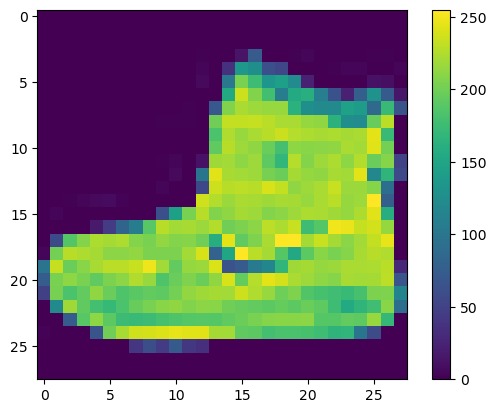

In [31]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [32]:
train_images = train_images / 255.0

test_images = test_images / 255.0

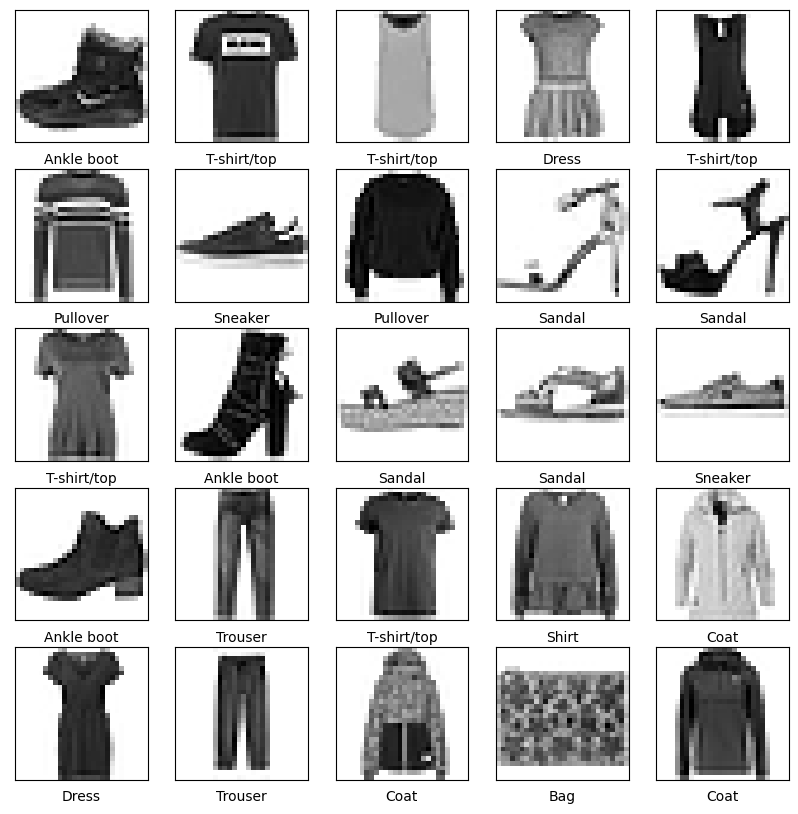

In [33]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [34]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [35]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [36]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5024 - accuracy: 0.8231
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3745 - accuracy: 0.8664
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3377 - accuracy: 0.8768
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3130 - accuracy: 0.8859
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2923 - accuracy: 0.8925
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2790 - accuracy: 0.8966
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2666 - accuracy: 0.9010
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2560 - accuracy: 0.9053
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2452 - accuracy: 0.9071
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.239

### 评估操作

In [37]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3416 - accuracy: 0.8822 - 291ms/epoch - 930us/step

Test accuracy: 0.8822000026702881


In [38]:
predictions = model.predict(test_images)

In [39]:
predictions.shape

(10000, 10)

In [40]:
predictions[0]

array([9.6482461e-07, 8.1604064e-12, 3.6174397e-11, 1.2592573e-11,
       1.5438956e-11, 4.7710520e-05, 6.1060490e-08, 3.2780912e-02,
       6.0503559e-08, 9.6717024e-01], dtype=float32)

In [41]:
np.argmax(predictions[0])

9

In [42]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

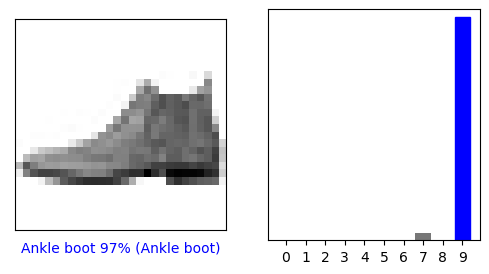

In [43]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

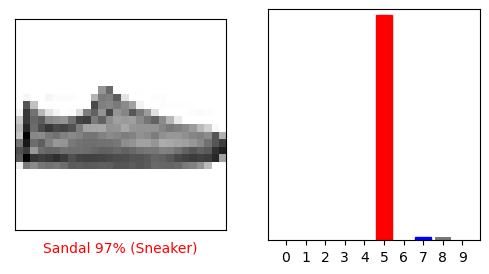

In [44]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

### 保存训练好的模型

保存权重参数与网络模型

In [45]:
model.save('fashion_model.h5')

网络架构

In [46]:
config = model.to_json()
config

'{"class_name": "Sequential", "config": {"name": "sequential_2", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 28, 28], "dtype": "float32", "sparse": false, "ragged": false, "name": "flatten_input"}}, {"class_name": "Flatten", "config": {"name": "flatten", "trainable": true, "batch_input_shape": [null, 28, 28], "dtype": "float32", "data_format": "channels_last"}}, {"class_name": "Dense", "config": {"name": "dense_6", "trainable": true, "dtype": "float32", "units": 128, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_7", "trainable": true, "dtype": "float32", "units": 10, "activation": "softmax", "use_bias": true, "kernel_initializer": {"cl

In [47]:
with open('config.json', 'w') as json:
    json.write(config)

In [48]:
model = keras.models.model_from_json(json_config)
model.summary()

NameError: name 'json_config' is not defined

权重参数

In [49]:
weights = model.get_weights()
weights

[array([[ 3.19447145e-02,  1.57583877e-02, -1.45018443e-01, ...,
          1.29620731e-02,  4.24247861e-01, -2.38128439e-01],
        [ 5.30451052e-02, -4.96290959e-02, -1.23668619e-01, ...,
          3.63280550e-02,  1.71967968e-02, -2.91030873e-02],
        [-1.11275315e-01, -1.63527474e-01, -1.24911644e-01, ...,
         -9.52160545e-03, -1.00124395e-03, -2.38880903e-01],
        ...,
        [-3.59962694e-04, -1.61577418e-01,  3.71536583e-01, ...,
         -9.70651731e-02,  1.37614280e-01, -1.42144635e-01],
        [ 1.48661453e-02,  2.35671714e-01,  2.60098666e-01, ...,
         -1.07000925e-01, -3.85990515e-02, -3.67646813e-01],
        [-2.63628453e-01, -5.24752997e-02,  1.66699126e-01, ...,
         -7.22772628e-02,  2.29351893e-01, -3.47815484e-01]], dtype=float32),
 array([ 0.10500908, -0.05080769,  0.32307202, -0.13710038,  0.2880362 ,
        -0.21502526,  0.14774986, -0.02360875,  0.28907105,  0.3066562 ,
         0.51882195,  0.5343729 ,  0.7560078 ,  0.21318436,  0.64305

In [50]:
model.save_weights('weights.h5')

In [51]:
model.load_weights('weights.h5')